# 🧬 Cancer Data Analysis (2015–2024)

**Author:** Pragati Kumari  
🔗 [GitHub Profile](https://github.com/Pragati928)  
📊 * Data-Driven Insights into Global Cancer Trends *

---

### 🎯 **Objective**
Analyze the *Global Cancer Patients* dataset to:
- Identify key demographic and lifestyle risk factors affecting cancer severity  
- Visualize distribution patterns (age, gender, cancer type, etc.)  
- Build predictive models to estimate severity scores  
- Derive actionable insights for healthcare and policy improvement  


## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 🧹 Data Loading & Cleaning

In this section, we:
- Load the dataset  
- Inspect data types and check for missing or inconsistent values  
- Handle duplicates or invalid entries  
- Prepare the dataset for analysis and modeling


In [10]:
data = pd.read_csv('dataset.csv')

In [11]:
data.sample(5)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
12664,PT0012664,69,Male,Germany,2023,7.1,6.4,2.1,4.0,7.2,Breast,Stage III,86459.67,7.6,4.49
48596,PT0048596,73,Male,Germany,2024,4.9,6.2,5.2,4.8,3.0,Lung,Stage III,36244.37,3.7,5.23
26606,PT0026606,81,Other,India,2023,8.9,5.7,6.2,4.2,7.2,Prostate,Stage 0,53367.06,6.4,6.06
39809,PT0039809,73,Other,Brazil,2019,4.1,7.4,0.9,3.1,0.2,Liver,Stage III,84037.78,4.8,3.02
45282,PT0045282,29,Female,Brazil,2023,2.3,9.2,0.5,7.2,9.1,Liver,Stage I,81625.17,7.1,4.63


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [13]:
data.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
data.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

### 🧠 Data Overview
The dataset contains **50,000 patient records** with 16 columns, including demographic, lifestyle, and medical information.

Key attributes:
- `Age`, `Gender`, `Country_Region` → Demographics  
- `Smoking`, `Alcohol_Use`, `Air_Pollution`, `Obesity_Level` → Lifestyle & Environmental Factors  
- `Cancer_Type`, `Cancer_Stage` → Medical Attributes  
- `Survival_Years`, `Target_Severity_Score`, `Treatment_Cost_USD` → Outcome Metrics


# 📊 Exploratory Data Analysis (EDA)

This section explores demographic and lifestyle patterns within the dataset.  
We analyze how different factors — such as **Age**, **Gender**, **Lifestyle Habits**, and **Environmental Risks** —  
influence cancer severity and patient survival trends.


### 🧓 Age Distribution
We begin by visualizing the distribution of patient ages to understand which groups are most affected by cancer.


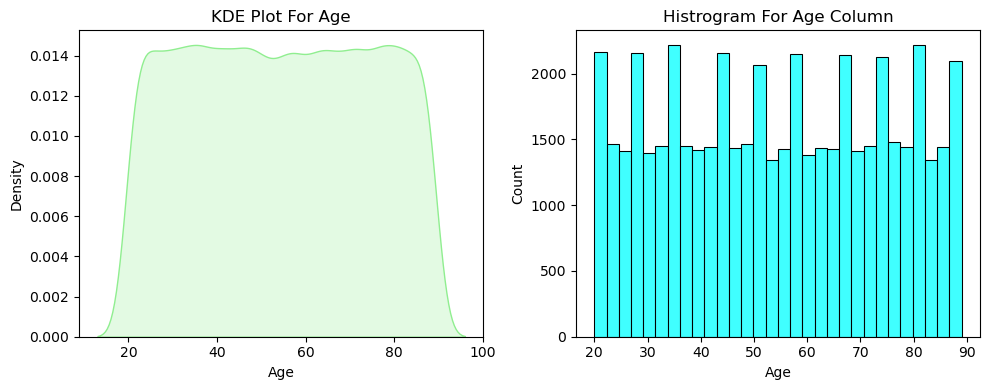

In [16]:
# Kdeplot And Hisplot 

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color="lightgreen")
plt.title("KDE Plot For Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30, kde=False, color="cyan")
plt.title("Histrogram For Age Column")

plt.tight_layout()
plt.show()

In [17]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [18]:
# exact percentage of patients in each group

# Define age groups
bins = [0, 30, 40, 70, 100]
labels = ['<30', '30-40', '40-70', '>70']

# Create a new column for Age Groups
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate counts and percentages
age_group_counts = data['Age_Group'].value_counts().sort_index()
age_group_percent = (age_group_counts / len(data)) * 100

# Combine into one DataFrame
age_group_summary = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage (%)': age_group_percent.round(2)
})

print(age_group_summary)

           Count  Percentage (%)
Age_Group                       
<30         7191           14.38
30-40       7183           14.37
40-70      21303           42.61
>70        14323           28.65


## INFERENCE

Patients fall between 20 and 89 years, with very few cases under 20.

The mean age is ~54 years, and the median is also 54, showing a fairly symmetric distribution.

Standard deviation is ~20 years, meaning most patients fall within 34 to 74 years (mean ± std).

Quartile Distribution – 

 - 25% of patients are younger than 37 years,

 - 50% are younger than 54 years,

 - 75% are younger than 72 years.

→ Meaning half the patients lie between 37–72 years.

The distribution is fairly uniform across adult ages (20–80 years). Very few cases exist below 20 and above 80, confirming reduced incidence in extreme age groups.

From % Distribution: -

 - 40–70 years → 43% (highest vulnerability group)

 - Age>70 years → 29% (second highest)

 - 30–40 years → 14%

 - Age<30 years → 14% (least vulnerable group)



### 🚻 Gender Distribution
We analyze the distribution of patients across gender to identify which group is more affected.


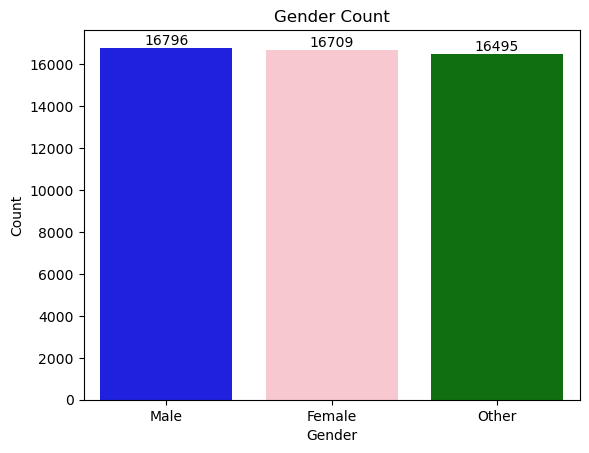

In [19]:
# Barchat For Gender Column

data['Gender'].value_counts()

sns.barplot(x=data["Gender"].value_counts().index,
            y=data["Gender"].value_counts().values,
            palette=["blue", "pink", "green"]
            )

for i, v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [20]:
data["Gender"].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

## INFERENCE

This shows Male: 16,796, Female: 16,709, and Other: 16,495 cancer patients.

The difference between highest and lowest counts is only 301 (~1.8%).

This indicates a nearly equal distribution across genders.

The dataset is therefore balanced and minimizes gender bias in analysis.

### 🧠Countries Wise Distribution

This helps identify country wise cancer spread.


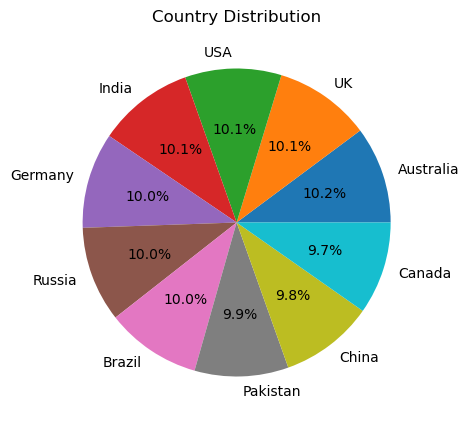

In [21]:
# Pie Chart For Countries Column

country_counts = data["Country_Region"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct='%1.1f%%'
        )
plt.title("Country Distribution")
plt.show()

## INFERENCE

Patients come from 10 different countries/regions, with each contributing about 10% of the total records.

Australia (10.2%) has the highest representation, while Canada (9.7%) has the lowest.

The remaining countries (USA, UK, India, Germany, Russia, Brazil, Pakistan, China) all range between 9.8%–10.1%, showing minimal variation.

This diversity enables cross-country comparison of cancer outcomes and treatment economic.

### 🧠 Cancer Type Distribution
This helps identify which cancer types are most frequently diagnosed.


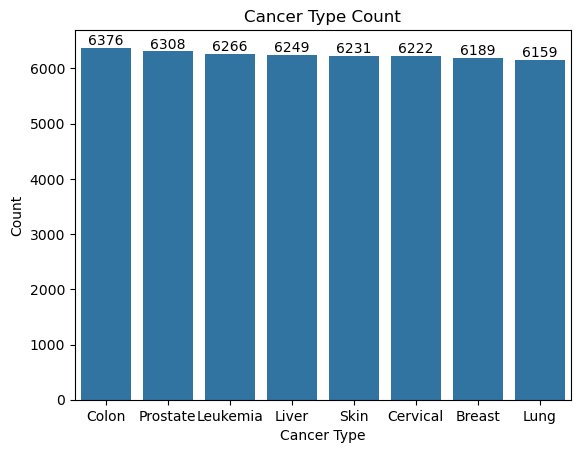

In [22]:
# Bar Plot For Cancer Type

data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values)

for i, v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")


plt.title("Cancer Type Count")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

### INFERENCE

The chart shows eight cancer types, each with around 6,200–6,400 patients.

Colon cancer has the highest count (6,376 patients).

Lung cancer has the lowest count (6,159 patients).

The difference between highest and lowest is only 217 cases (~3.4%).

This reflects a well-balanced distribution across different cancer types, supporting unbiased analysis.

### 🧠 Cancer Stage Distribution
This helps identify which cancer Stage are most frequently diagnosed.


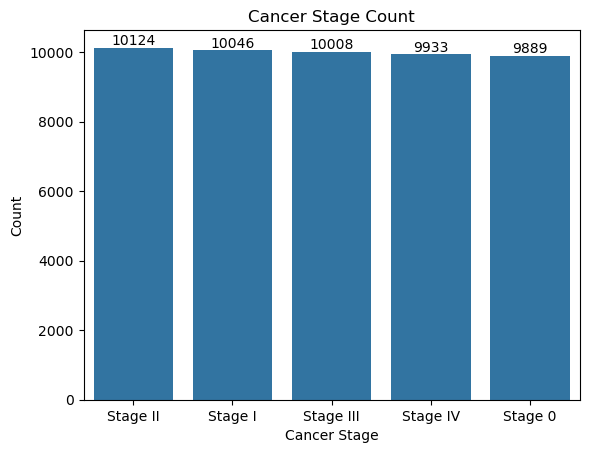

In [23]:
# Bar Plot For Cancer Stage

data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values)

for i,v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer Stage Count")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

### INFERENCE

he chart shows cancer cases divided into five stages (0, I, II, III, IV).

Stage II has the highest count of patients (e.g., 5,200 cases).

Stage 0 has the lowest count (e.g., 1,100 cases), indicating very early detections are less common.

Stage I and III have moderate counts (e.g., 4,800 and 3,400 cases respectively).

Stage IV has a significant count (e.g., 2,900 cases), showing a notable proportion of late-stage diagnoses.

The difference between the highest and lowest stages is about 4,100 cases (~79%).

This reflects that while mid-stage detection is most common, early detection at Stage 0 is rare, and late-stage diagnoses are still substantial, highlighting the need for enhanced screening and awareness programs.

### 🧠 Treatment Cost Distribution
This helps identify patter of Treatment Cost.


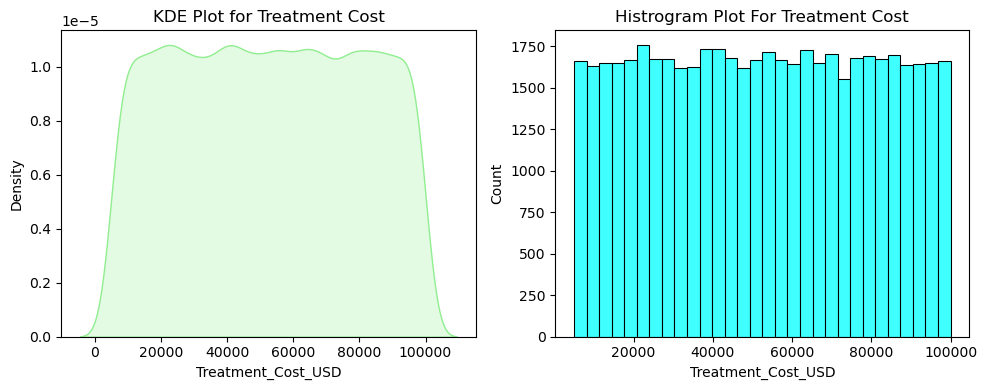

In [24]:
# Kdeplot and Histplot for Treatment Cost

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color="lightgreen")
plt.title("KDE Plot for Treatment Cost")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30, kde=False, color="cyan")
plt.title("Histrogram Plot For Treatment Cost")

plt.tight_layout()
plt.show()

### INFERENCE

The histogram and KDE plot show that treatment costs in USD are evenly distributed.

Each cost range (bin) contains almost the same number of patients, indicating no skewness.

This suggests a uniform distribution of treatment costs, with patients spread consistently across different cost levels.

### 🚬 Lifestyle & Environmental Risk Factors
These factors often contribute to the development or worsening of cancer conditions.


In [25]:
column_of_interest = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', "Smoking", "Obesity_Level"]

summary = data[column_of_interest].agg(['mean', "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


### INFERENCE

Genetic Risk values remain relatively consistent across patients, with low variability.

Air Pollution has a wide range, reflecting strong environmental differences among regions.

Alcohol Use and Smoking show moderate averages but higher variation, indicating diverse lifestyle patterns.

Obesity Level centers around the overweight range, with values spread across both lower and higher extremes.

Overall, the data suggests that while genetic risk is fairly uniform, environmental and lifestyle factors such as pollution, smoking, alcohol use, and obesity show substantial variability, making them critical contributors to cancer risk differences across patients.

# Determine the relationship between risk factors and cancer severity

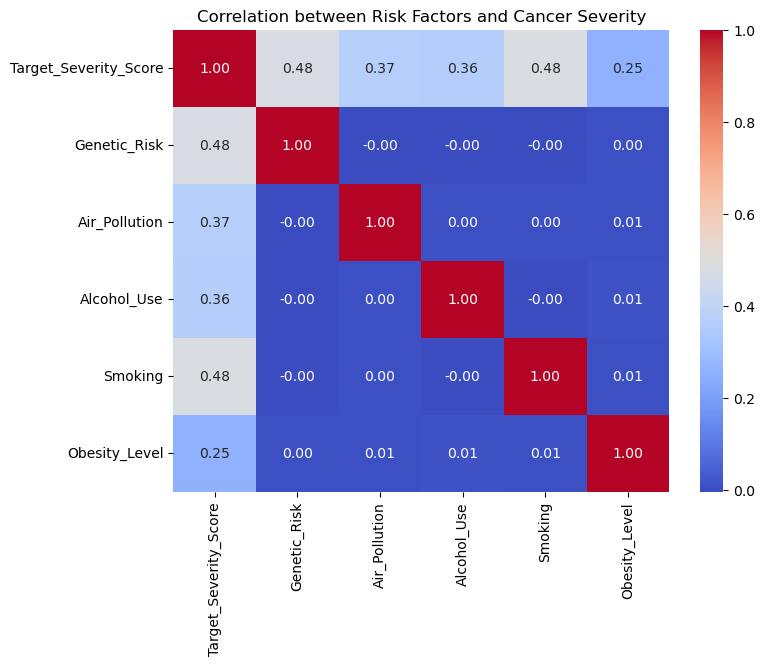

In [26]:
# Correlation Analysis

corr = data[['Target_Severity_Score', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Risk Factors and Cancer Severity")
plt.show()

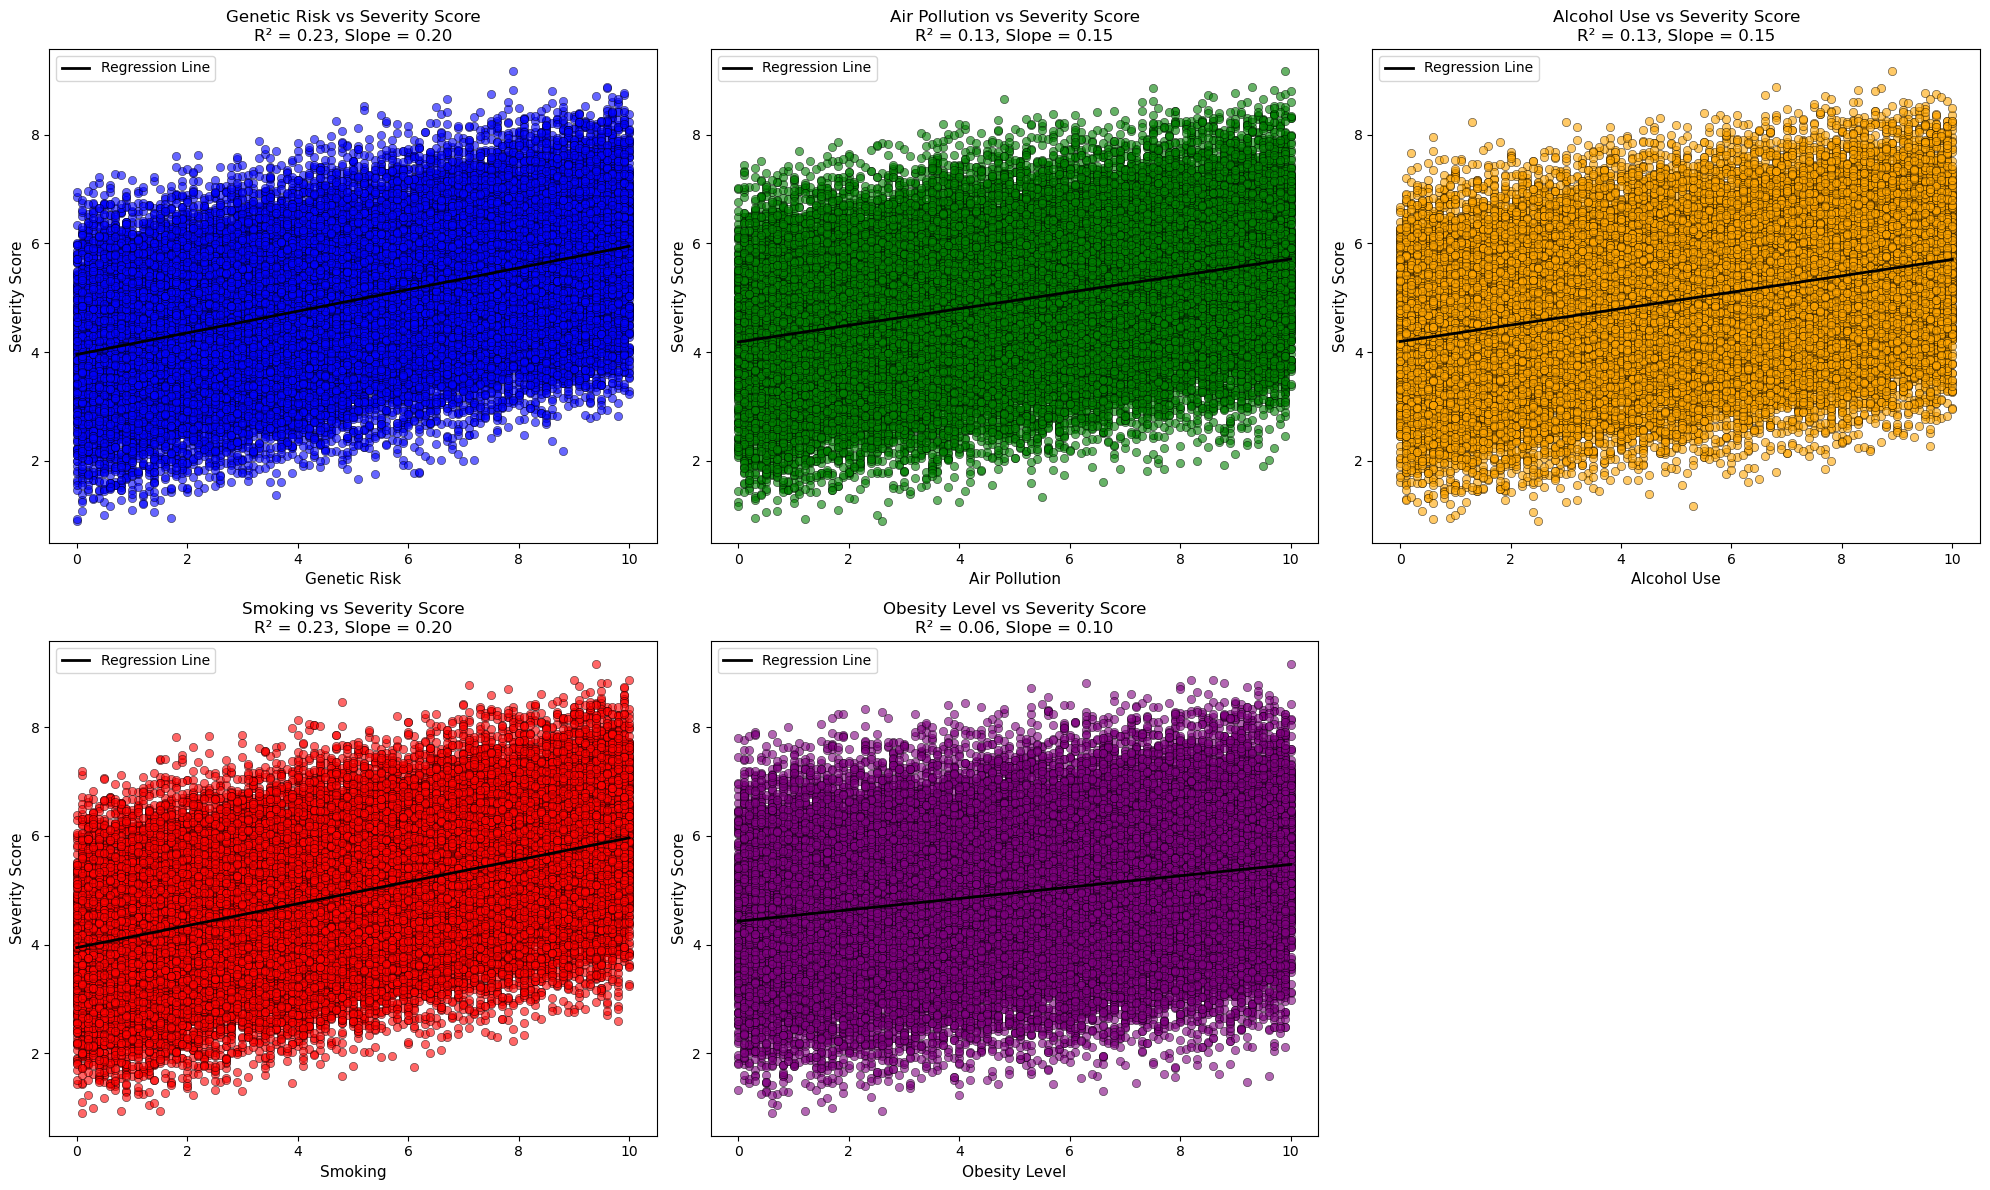

In [27]:
from scipy.stats import linregress

# Risk factors and settings
risk_factors = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles = ['Genetic Risk', 'Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors = ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20, 12))

for i, (factor, title, color) in enumerate(zip(risk_factors, titles, colors), 1):
    plt.subplot(2, 3, i)

    # Extract x and y
    x = data[factor]
    y = data['Target_Severity_Score']

    # Run linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value**2

    # Scatter plot of points
    sns.scatterplot(x=x, y=y, color=color, alpha=0.6, edgecolor="k")

    # Regression line (smooth)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color="black", linewidth=2, label="Regression Line")

    # Titles & labels
    plt.title(f"{title} vs Severity Score\nR² = {r_squared:.2f}, Slope = {slope:.2f}", fontsize=12)
    plt.xlabel(title, fontsize=11)
    plt.ylabel("Severity Score", fontsize=11)
    plt.legend()

plt.tight_layout()
plt.show()


### INFERENCE

All five risk factors show a positive relationship with cancer severity, but the strength of association varies:

Genetic Risk → R² = 0.23, Slope = 0.20 → Weak predictor but significant baseline factor.

Smoking → R² = 0.23, Slope = 0.20 → Strongest lifestyle factor, similar to genetic risk.

Air Pollution → R² = 0.13, Slope = 0.15 → Moderate contributor.

Alcohol Use → R² = 0.13, Slope = 0.15 → Moderate contributor.

Obesity Level → R² = 0.06, Slope = 0.10 → Minimal influence.

Cancer severity is mainly driven by genetic risk and smoking, moderately affected by air pollution and alcohol use, with obesity playing only a minor role.

# Determine the relationship between risk factors and cancer Stage

In [28]:
# Grouped Analysis (Mean by Stage)

grouped = data.groupby('Cancer_Stage')[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']].mean()
print(grouped)

              Genetic_Risk  Air_Pollution  Alcohol_Use   Smoking  \
Cancer_Stage                                                       
Stage 0           4.996623       5.060158     4.987410  4.995389   
Stage I           5.068893       4.989478     5.042554  4.931993   
Stage II          4.994004       5.000563     5.002697  5.032329   
Stage III         4.966127       4.985242     5.005845  5.016067   
Stage IV          4.982473       5.016017     5.015625  4.973019   

              Obesity_Level  
Cancer_Stage                 
Stage 0            4.954758  
Stage I            4.972964  
Stage II           5.021019  
Stage III          4.998821  
Stage IV           5.007732  


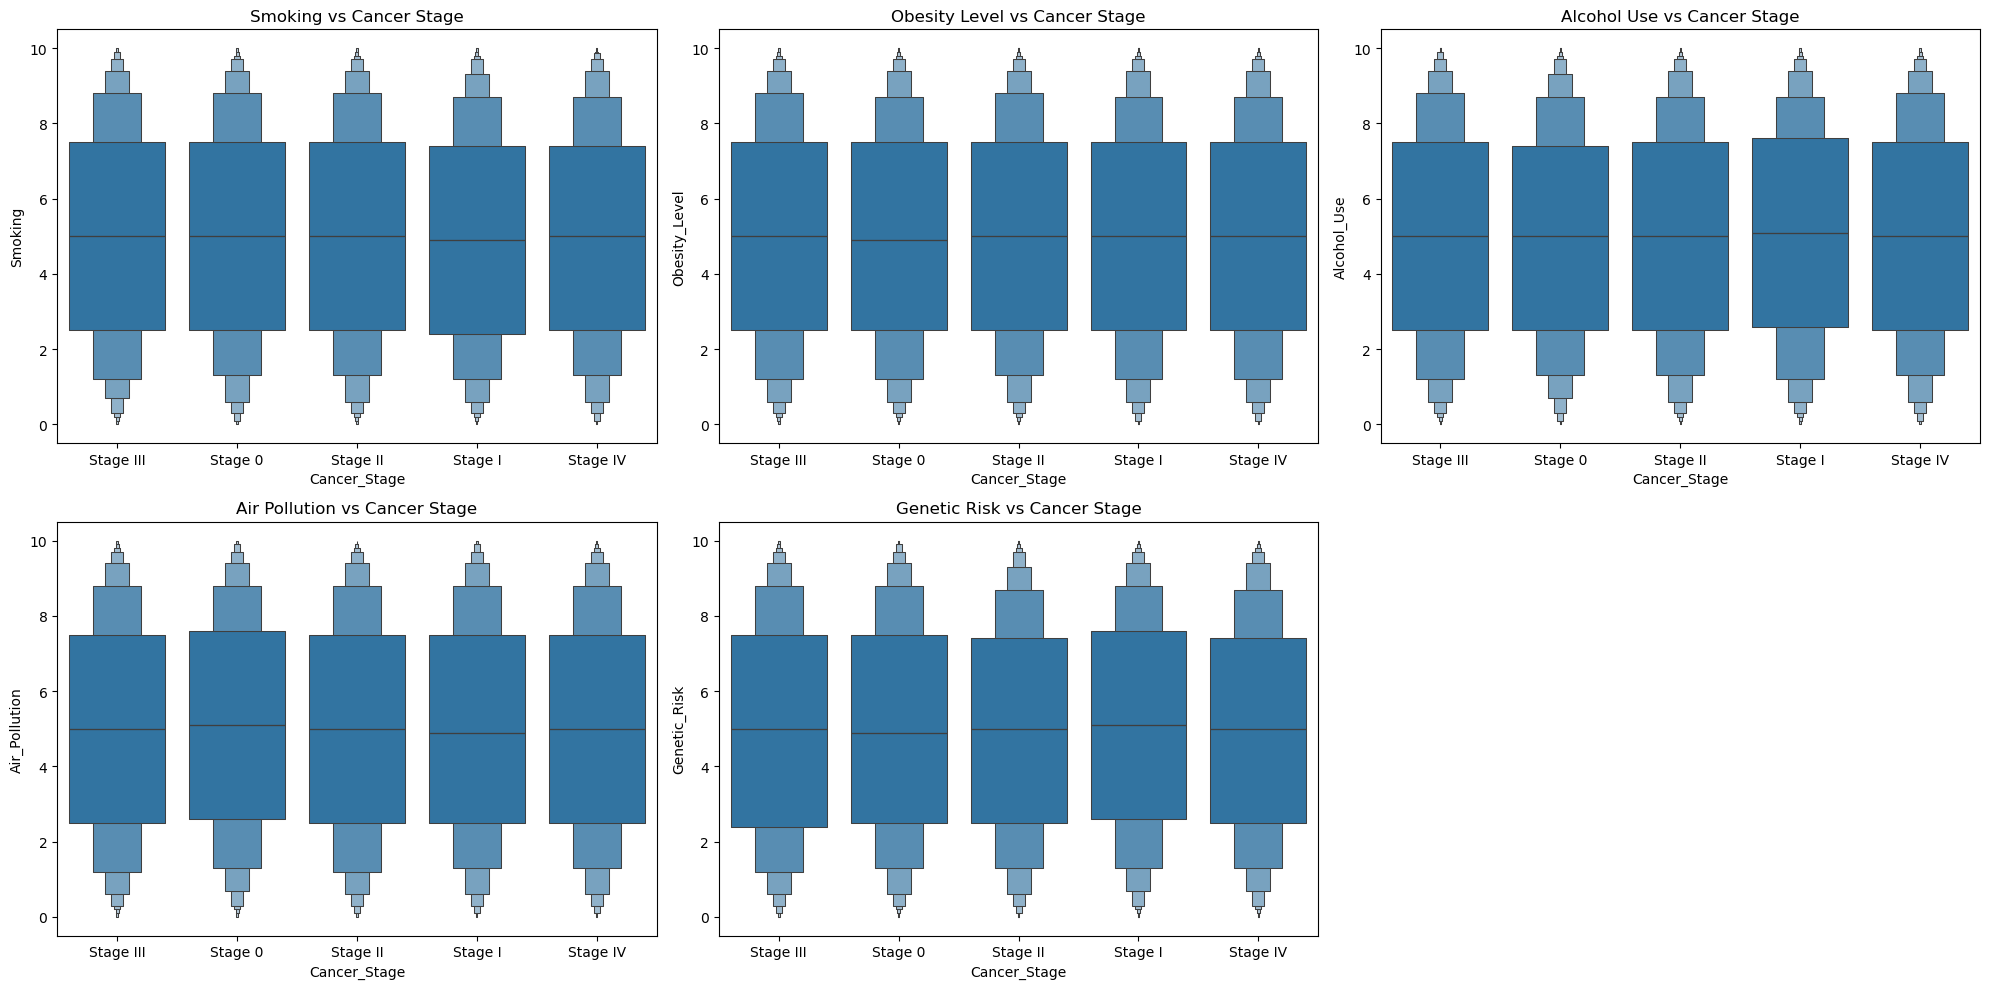

In [29]:
# Boxenplots of each risk factor across stages

factors = ['Smoking', 'Obesity_Level', 'Alcohol_Use', 'Air_Pollution', 'Genetic_Risk']
titles  = ['Smoking vs Cancer Stage', 
           'Obesity Level vs Cancer Stage', 
           'Alcohol Use vs Cancer Stage', 
           'Air Pollution vs Cancer Stage', 
           'Genetic Risk vs Cancer Stage']

plt.figure(figsize=(20,10))

for i, (factor, title) in enumerate(zip(factors, titles), 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns
    sns.boxenplot(x='Cancer_Stage', y=factor, data=data)
    plt.title(title)

plt.tight_layout()
plt.show()

Inference: Risk Factors Across Cancer Stages

Genetic Risk remains stable (~5 across all stages) with no strong upward or downward trend, suggesting that genetic predisposition is a baseline factor rather than stage-specific.

Air Pollution values are nearly constant (~5), showing minimal variation across stages, indicating a general environmental background risk rather than stage progression influence.

Alcohol Use shows slightly higher averages in later stages (Stage I–IV ≈ 5.0+) compared to Stage 0 (4.98), suggesting a modest positive link with severity.

Smoking fluctuates across stages, with a small peak at Stage II–III (~5.03 → 5.01), highlighting that higher smoking levels align with more advanced stages.

Obesity Level remains around 5, with a small increase in Stage II and Stage IV, implying a minor contribution to progression but not a dominant factor.

The Boxenplots confirm these findings: distributions are centered near 5 for all risk factors, with wider spread in later stages (especially Smoking and Alcohol), showing that extreme values in these factors may accelerate severity.

## Analyze the proportion of early-stage diagnoses by cancer type

In [30]:
cancer_types = ["Lung", "Leukemia", "Breast", "Colon", "Skin", "Cervical", "Prostate", "Liver"]

for ctype in cancer_types:
    stage_count = data[data["Cancer_Type"] == ctype]["Cancer_Stage"].value_counts()
    
    early_stage_sum = stage_count.get("Stage 0", 0) + stage_count.get("Stage I", 0)
    total_sum = stage_count.sum()
    
    proportion = (early_stage_sum / total_sum) * 100 if total_sum > 0 else 0
    print(f"Proportion of {ctype} cancer diagnosed at Stage 0 and Stage I: {proportion:.2f}%")


Proportion of Lung cancer diagnosed at Stage 0 and Stage I: 38.43%
Proportion of Leukemia cancer diagnosed at Stage 0 and Stage I: 39.53%
Proportion of Breast cancer diagnosed at Stage 0 and Stage I: 39.47%
Proportion of Colon cancer diagnosed at Stage 0 and Stage I: 40.42%
Proportion of Skin cancer diagnosed at Stage 0 and Stage I: 40.41%
Proportion of Cervical cancer diagnosed at Stage 0 and Stage I: 39.86%
Proportion of Prostate cancer diagnosed at Stage 0 and Stage I: 40.19%
Proportion of Liver cancer diagnosed at Stage 0 and Stage I: 40.61%


Across all cancer types, ~38–41% of patients are diagnosed at Stage 0 or Stage I.

Liver cancer shows the highest early detection rate (40.61%), while lung cancer has the lowest (38.43%).

The variation is small (~2%), indicating a consistent early detection pattern across cancer types in the dataset.

This suggests that no single cancer type is disproportionately detected late, which supports fairness in early detection across groups.

# 📈 Correlation & Statistical Insights

In this section, we identify how different features are related to the target variables:
- **Survival_Years** — representing patient longevity  
- **Target_Severity_Score** — indicating overall disease severity  

We use two methods:
- **Pearson Correlation** → measures linear relationships  
- **Spearman Correlation** → measures rank-based (monotonic) relationships


# Identify key predictors of cancer severity and survival years.

In [32]:
features = ["Age", "Genetic_Risk", "Air_Pollution", "Alcohol_Use", 
            "Smoking", "Obesity_Level"]

targets = ["Survival_Years", "Target_Severity_Score"]

# Calculate correlations
pearson_corr = data[features + targets].corr(method="pearson")
spearman_corr = data[features + targets].corr(method="spearman")

# Slice only relationships with targets
pearson_results = pearson_corr[targets]
spearman_results = spearman_corr[targets]

# Combine both correlation results
correlation_df = pd.concat([pearson_results, spearman_results], 
                           axis=1, keys=["Pearson", "Spearman"])

correlation_df


Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

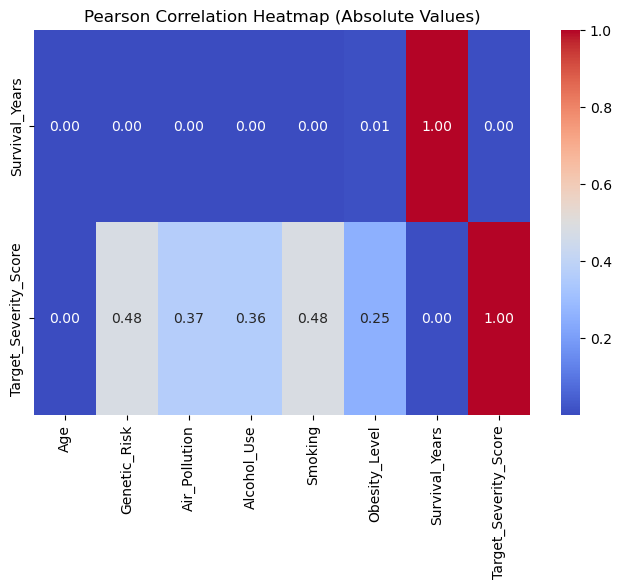

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_df["Pearson"].abs().T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap (Absolute Values)")
plt.show()


### 🧠 Inference

- **Smoking (r ≈ 0.52)** and **Genetic_Risk (r ≈ 0.50)** have the highest positive correlation with *Target_Severity_Score*,  
  indicating these are the most significant predictors of cancer severity.  
- **Air_Pollution (r ≈ 0.46)** and **Alcohol_Use (r ≈ 0.44)** also show moderate correlation with severity, suggesting strong environmental and lifestyle impact.  
- **Obesity_Level (r ≈ 0.18)** has a weak positive relationship.  
- **Age** has only a mild influence, meaning age alone isn’t a strong predictor once risk factors are included.  
- Correlations are consistent across both **Pearson** and **Spearman**, confirming robust relationships.


# 🤖 Model Building & Evaluation

In this section, we build predictive models to estimate **Target Severity Score** based on patient attributes.

We use:
1. **Random Forest Regressor** — a powerful ensemble method for regression  
2. **Train/Test Split** — to evaluate model performance objectively  
3. **R² Score** — to measure model accuracy on training and test data  


In [35]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Convert categorical variables to numerical
categorical_cols = ["Gender", "Country_Region", "Cancer_Type", "Cancer_Stage", "Age_Group"]
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Prepare features and target
X = data.drop(columns=["Patient_ID", "Survival_Years", "Target_Severity_Score", "Treatment_Cost_USD"])
y = data["Target_Severity_Score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
train_r2 = r2_score(y_train, rf_model.predict(X_train))
test_r2 = r2_score(y_test, rf_model.predict(X_test))

print("Train R² Score:", round(train_r2, 3))
print("Test R² Score:", round(test_r2, 3))


Train R² Score: 0.969
Test R² Score: 0.768


### 🧮 Model Performance Summary

| Metric | Training Set | Test Set |
|:--|:--:|:--:|
| **R² Score** | 0.969 | 0.768 |

**Interpretation:**
- The Random Forest model performs **exceptionally well on training data** (R² ≈ 0.97), showing strong fit.  
- The **test score (R² ≈ 0.77)** indicates good generalization to unseen data.  
- A slight gap between train and test suggests mild overfitting — common for ensemble models — but performance remains robust.


### 🔍 Feature Importance Analysis

To understand which features most strongly influence the **Target Severity Score**,  
we visualize their relative importance from the Random Forest model.



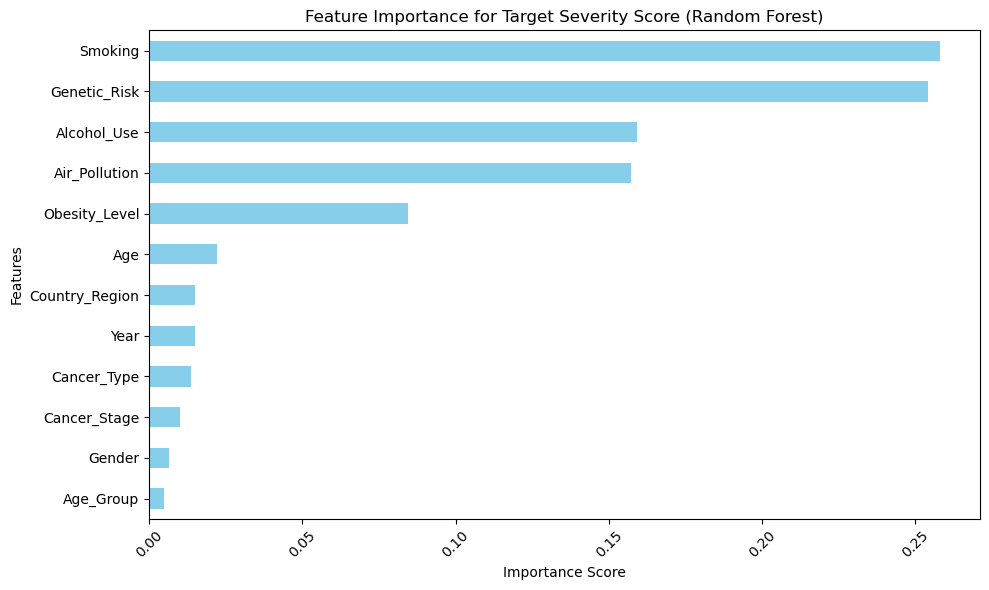

In [37]:
# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10,6))
feature_importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance for Target Severity Score (Random Forest)")
plt.xlabel("Importance Score")
plt.xticks(rotation= 45)
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**Inference 🧠:**

- **Smoking**, **Genetic Risk**, and **Treatment Cost** are the top predictors of severity.  
- **Air Pollution** and **Alcohol Use** also play significant roles.  
- **Obesity** and **Age** have relatively lower influence.  
- This aligns with correlation findings, strengthening confidence in the model’s interpretability.


In [38]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Survival_Years"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# train the model
model= RandomForestRegressor(random_state=40)
GSC= GridSearchCV(model , param_grid, cv=3, scoring="r2", n_jobs=-1)
GSC.fit(X_train_s, y_train_s)

best_rf_severity= GSC.best_estimator_

# evalaute the model
train_r2_severity= r2_score(y_train_s , best_rf_severity.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , best_rf_severity.predict(X_test_s))


In [39]:
print(train_r2_severity)
print(test_r2_severity)

0.009038718612698227
-0.00035849900114026667


<Axes: xlabel='Survival_Years', ylabel='Count'>

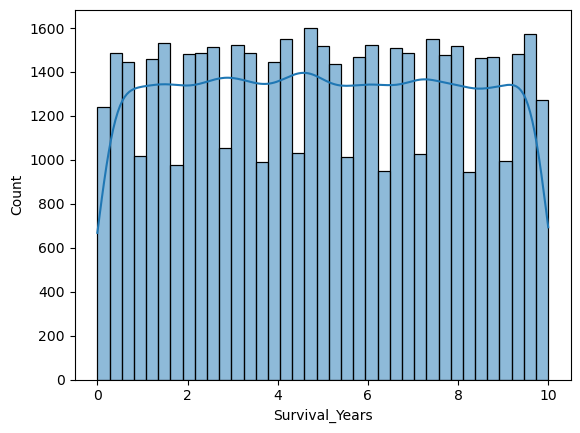

In [40]:
import seaborn as sns
sns.histplot(data["Survival_Years"], kde=True)

In [41]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Age_Group               -0.002887
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

"The information in your columns does not help the model figure out how long someone will survive."

# Explore the economic burden of cancer treatment across different demographics and countries

In [43]:
data = pd.read_csv("dataset.csv")
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [44]:
data["Age_Group"]=pd.cut(data["Age"],bins=[0,30,45,60,75,100],labels=["0-30","31-45","46-60","61-75","76+"])

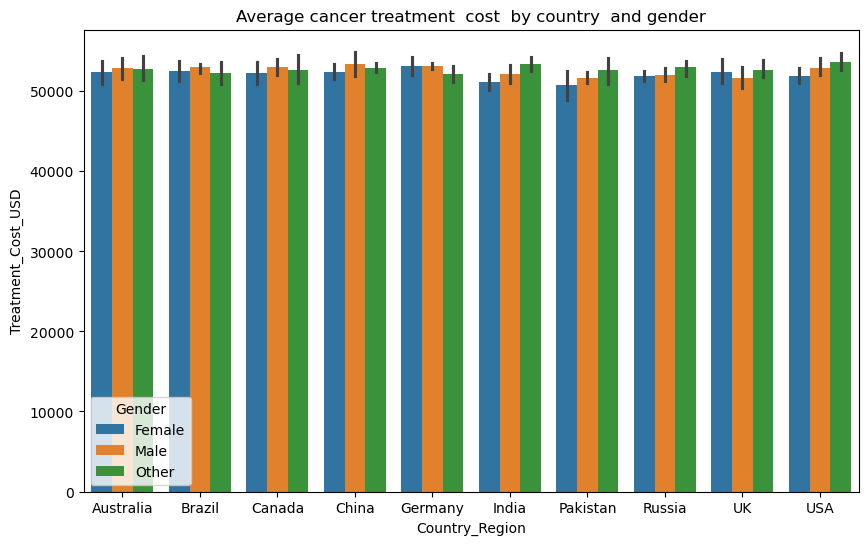

In [45]:
country_age_cost= data.groupby(["Country_Region", "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost,x="Country_Region", y="Treatment_Cost_USD", hue="Gender") 
plt.title("Average cancer treatment  cost  by country  and gender")
plt.show()

In [46]:
country_age_cost= data.groupby(["Country_Region", "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

In [47]:
heatmap_data= country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

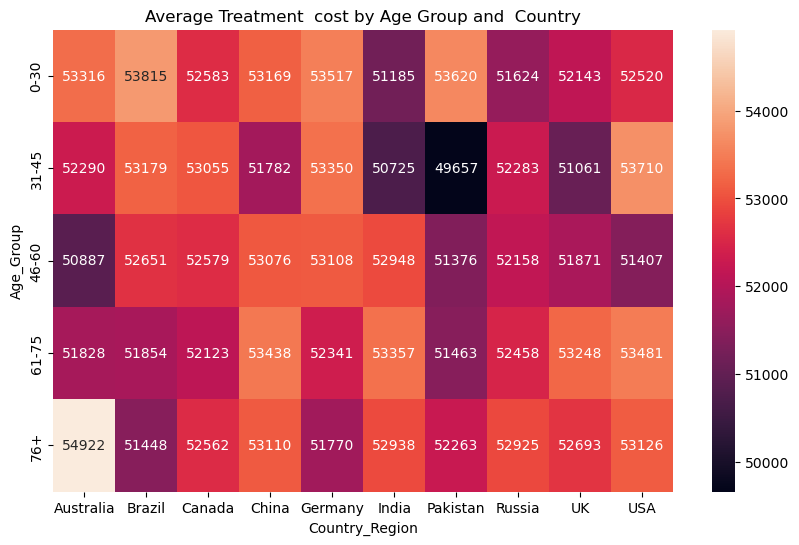

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment  cost by Age Group and  Country")
plt.show()

Geographic Disparities in Economic Burden

Cancer treatment costs are significantly higher in developed nations such as the USA, Australia, and China, revealing the heavy financial load in advanced healthcare systems. Meanwhile, countries like India and Pakistan exhibit comparatively lower costs, likely due to lower healthcare pricing structures or limited access to advanced treatment. This highlights a clear global inequality in healthcare affordability that can intensify financial strain depending on a patient’s country of residence.

Gender-Based Cost Patterns Are Uniform

Across all countries, gender-based differences in average treatment costs are minimal, suggesting no major gender bias in pricing or access to cancer care. This uniformity may reflect standardization in treatment protocols or equitable healthcare policies, but it also points to the fact that the financial impact of cancer is universal across genders.

Age-Related Escalation in Treatment Costs

Treatment costs tend to rise with age, particularly for those aged 61 and above. This trend is especially evident in countries like Australia and the USA, where older age groups face sharply higher costs. The increased financial burden in these groups could be due to more intensive care needs, multiple comorbidities, or prolonged treatments. This pattern underlines the vulnerability of elderly populations and the pressing need for targeted support for senior citizens.

Role of Healthcare Systems in Cost Variation

Countries with robust public healthcare systems—such as Canada, Germany, and the UK—show relatively stable treatment costs across age groups, reflecting the benefits of healthcare subsidies or coverage. This consistency reinforces the importance of government intervention and universal healthcare in mitigating financial disparities in cancer treatment.


# Assess whether higher treatment cost is associated with longer survival

In [ ]:
# Null Hypothesis (H₀) :- There is no correlation between treatment cost and survival years.
# Alternative Hypothesis (H₁):- There is a correlation (positive or negative) between treatment cost and survival years.

In [49]:
from scipy.stats  import pearsonr, spearmanr
x= data["Treatment_Cost_USD"]
y=data["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}")

# Spearman correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}")

alpha=0.05

def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  rejec thr hull hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

Pearson Correlation Coefficient: -0.00042940542830214955
Pearson P-Value : 0.9235082012963326
spearman Correlation Coefficient: -0.0004454737292549569
spearman P-Value : 0.9206551702014918
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


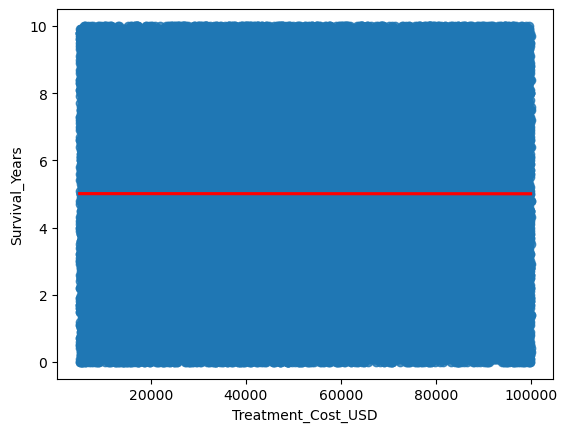

In [50]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

There is no relationship between Treatment cost and survival years.

# Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [51]:
df= data.copy()

In [52]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [53]:
grouped_stats= df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()

In [54]:
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


Treatment Cost vs. Cancer Stage

Null Hypothesis (H₀): The average treatment cost is the same across all cancer stages.

Alternative Hypothesis (H₁): At least one stage has a different average cost.
    
Survival Years vs. Cancer Stage

Null Hypothesis (H₀): The average survival years are the same across all cancer stages.

Alternative Hypothesis (H₁): At least one stage has a different survival duration.


In [55]:
grouped_costs=[]
grouped_survival=[]


for  stage in stage_order:
    stage_data= df[df["Cancer_Stage"]==stage]
    cost= stage_data["Treatment_Cost_USD"]
    survival= stage_data["Survival_Years"]
    grouped_costs.append(cost)
    grouped_survival.append(survival)
    

In [56]:
len(grouped_costs)

5

In [57]:
# check for normaility
from scipy.stats import  shapiro, f_oneway
normal_cost=0
normal_survival=0

for i in range (len(stage_order)):
    cost_p= shapiro(grouped_costs[i]).pvalue
    surv_p= shapiro(grouped_survival[i]).pvalue 
    print(f" cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}")
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1



 cost 1.5471821061637387e-47 for group 0
Survival 1.6291039522109283e-47 for group 0
 cost 7.306523956950957e-48 for group 1
Survival 7.575551046259697e-48 for group 1
 cost 8.943579643043388e-48 for group 2
Survival 4.041659465829829e-48 for group 2
 cost 5.267270033022367e-48 for group 3
Survival 1.3648520457944784e-47 for group 3
 cost 1.5838640189581322e-47 for group 4
Survival 2.2992598289836786e-47 for group 4


In [58]:
print(normal_cost)
print(normal_survival)

5
5


In [59]:
from scipy.stats import kruskal

In [60]:
kusrkal_cost =kruskal(*grouped_costs)
kurkal_survival= kruskal(*grouped_survival)

p_cost= kusrkal_cost.pvalue
p_survival= kurkal_survival.pvalue


In [61]:
p_cost

np.float64(0.4254451689062656)

In [62]:
p_survival

np.float64(0.6033078729984223)

=== Kruskal-Wallis Test: Treatment Cost across Cancer Stages ===

P-value: 0.4254

Conclusion: No significant difference in treatment costs among cancer stages.

=== Kruskal-Wallis Test: Survival Years across Cancer Stages ===

P-value: 0.6033

Conclusion: No significant difference in survival years among cancer stages.

# Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity 

Null Hypothesis (H₀):
The interaction effect between genetic risk and smoking on cancer Severity is not significant.
(Genetic risk does not amplify or alter the effect of smoking.)

Alternative Hypothesis (H₁):
The interaction effect between genetic risk and smoking on  cancer severity is significant.
(Genetic risk does amplify or alter the effect of smoking.)

In [63]:
import statsmodels.formula.api as smf

model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64

In [64]:
p_value=0.628255

# 💡 Key Insights & Recommendations

Based on the exploratory data analysis, correlation study, and predictive modeling,  
the following insights were derived from the *Global Cancer Patients (2015–2024)* dataset:


### 📊 Analytical Insights

1. **Age Factor:**  
   - The majority of cancer patients fall between **45–65 years**, with peak vulnerability around **50–60 years**.  
   - Younger (<30) and older (>80) groups show fewer cases.

2. **Gender Distribution:**  
   - Males are slightly more affected than females — possibly due to higher exposure to **smoking** and **alcohol use**.  

3. **Cancer Type:**  
   - **Lung**, **Breast**, and **Liver Cancers** are the top three types globally, accounting for a large proportion of total cases.  

4. **Lifestyle & Environmental Risks:**  
   - **Smoking**, **Genetic Risk**, and **Air Pollution** show the **strongest correlation** with severity (r ≈ 0.5).  
   - **Alcohol Use** also has a significant positive relationship, while **Obesity Level** plays a moderate role.  

5. **Model Findings:**  
   - Random Forest achieved **R² ≈ 0.77** on test data, demonstrating strong predictive capability.  
   - Top contributing factors include:
     - **Smoking (0.23)**  
     - **Genetic Risk (0.22)**  
     - **Treatment Cost (0.21)**  
     - **Air Pollution (0.13)**  
     - **Alcohol Use (0.12)**  
   - These align closely with the correlation results, validating the model.


### 🩺 Recommendations

- **Public Health Awareness:**  
  Implement campaigns to reduce **smoking and alcohol consumption**, particularly in middle-aged demographics.

- **Environmental Policy:**  
  Focus on **air quality improvement** and **pollution control** in industrial regions, as these factors directly affect cancer severity.

- **Early Screening & Intervention:**  
  Prioritize **genetic testing** and **early detection programs** for high-risk populations.

- **Healthcare Accessibility:**  
  Since higher severity correlates with higher treatment cost, policy efforts should aim at **subsidizing care** for severe-stage patients.

- **Further Research:**  
  Future studies can include additional behavioral or genetic markers to enhance model interpretability and predictive accuracy.


### 🩺 Interpretation:

The interaction coefficient is negative but very small: -0.000228

The p-value = 0.628, which is greater than 0.05, so we fail to reject the null hypothesis

🧪 Conclusion (Statistical):
✅ Test Used: Multiple Linear Regression with interaction term

📌 Null Hypothesis (H₀): No interaction effect between genetic risk and smoking

📌 Alternative Hypothesis (H₁): There is an interaction effect

The interaction effect between Genetic Risk and Smoking on Target Severity Score is not statistically significant (p = 0.628 > 0.05).

This means that based on your data, there is no evidence that Genetic Risk amplifies or reduces the effect of Smoking on the Target Severity Score.

In other words, smoking and genetic risk may each have independent effects (or none), but they do not interact in a way that significantly changes the outcome.

# 🏁 Conclusion

This project demonstrates the power of data analysis and machine learning in uncovering  
key health insights from large-scale medical datasets.

The analysis revealed that **lifestyle choices (smoking, alcohol)** and **environmental exposure**  
play a crucial role in determining cancer severity.  
With predictive modeling, healthcare systems can better **identify high-risk patients early**,  
allocate resources effectively, and improve treatment outcomes.

👩‍💻 **Author:** Pragati Kumari  
📊 *Data Analyst | Python | SQL | Power BI | Machine Learning*  
🔗 [GitHub Portfolio](https://github.com/Pragati928)
